In [2]:
from keras.models import model_from_json
import cv2
import matplotlib.pyplot as plt

with open('model.json', 'r') as f:
    model = model_from_json(f.read())
model.load_weights('weights.h5')

c:\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


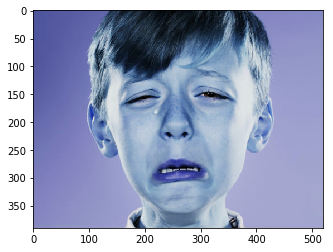

In [4]:
p = cv2.imread('img2.jpg',1)
plt.imshow(p)

f= 0
gray=cv2.cvtColor(p,cv2.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray,1.3,5)
for(x,y,w,h) in faces:
    f=1
    cv2.rectangle(p,(x,y),(x+w,y+h),(255,0,0),2)
    image=p[y:y+h,x:x+w]
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Press v to click',image)
    image = cv2.resize(image,(200,200), interpolation = cv2.INTER_CUBIC)

    print(image.shape)


if f==1:
    print(1)
    image.resize(1,64,64,1)
    pr = model.predict(image)
else:
    p.resize(1,64,64,1)
    pr = model.predict(p)

In [10]:
pr[0][3]

0.864999

In [11]:
pr
import numpy as np

predict = pr[0]*10000000
for i in range(len(predict)):
    predict[i]=int(predict[i])

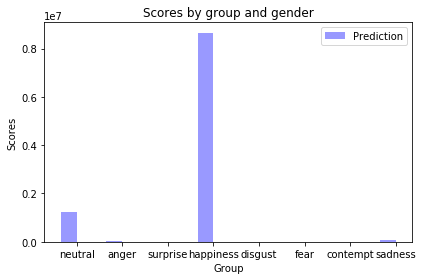

In [12]:
import matplotlib.pyplot as plt

n_groups = len(predict)
index = np.arange(n_groups)
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, predict, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Prediction')
plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width / 2, ('neutral', 'anger', 'surprise', 'happiness', 'disgust','fear','contempt','sadness'))
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def face(image):
    if 